Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

Carregando os dados

In [2]:
df = pd.read_csv("../../raw-data/CSV/heart.csv")

Renomeando as colunas

In [3]:
colunas_portugues = {
    "age": "idade",
    "sex": "sexo",
    "cp": "tipo_dor_peito",
    "trestbps": "pressao_repouso",
    "chol": "colesterol",
    "fbs": "acucar_sangue",
    "restecg": "eletro_repouso",
    "thalach": "freq_cardiaca_max",
    "exang": "angina_exercicio",
    "oldpeak": "depressao_st",
    "slope": "inclinacao_st",
    "ca": "vasos_principais",
    "thal": "talassemia",
    "target": "alvo"
}
df = df.rename(columns=colunas_portugues)

Estatísticas básicas...

In [4]:
print("Dimensões do Dataset:", df.shape)
print("\nTipos de dados:\n", df.dtypes)
print("\nEstatísticas descritivas:\n", df.describe())

Dimensões do Dataset: (303, 14)

Tipos de dados:
 idade                  int64
sexo                   int64
tipo_dor_peito         int64
pressao_repouso        int64
colesterol             int64
acucar_sangue          int64
eletro_repouso         int64
freq_cardiaca_max      int64
angina_exercicio       int64
depressao_st         float64
inclinacao_st          int64
vasos_principais       int64
talassemia             int64
alvo                   int64
dtype: object

Estatísticas descritivas:
             idade        sexo  tipo_dor_peito  pressao_repouso  colesterol  \
count  303.000000  303.000000      303.000000       303.000000  303.000000   
mean    54.366337    0.683168        0.966997       131.623762  246.264026   
std      9.082101    0.466011        1.032052        17.538143   51.830751   
min     29.000000    0.000000        0.000000        94.000000  126.000000   
25%     47.500000    0.000000        0.000000       120.000000  211.000000   
50%     55.000000    1.000000     

Verificação de valores ausentes

In [5]:
valores_ausentes = df.isnull().sum()
print("\nValores ausentes:\n", valores_ausentes)


Valores ausentes:
 idade                0
sexo                 0
tipo_dor_peito       0
pressao_repouso      0
colesterol           0
acucar_sangue        0
eletro_repouso       0
freq_cardiaca_max    0
angina_exercicio     0
depressao_st         0
inclinacao_st        0
vasos_principais     0
talassemia           0
alvo                 0
dtype: int64


Análise de distribuição das variáveis numéricas

In [6]:
variaveis_numericas = ["idade", "pressao_repouso", "colesterol", "freq_cardiaca_max", "depressao_st"]

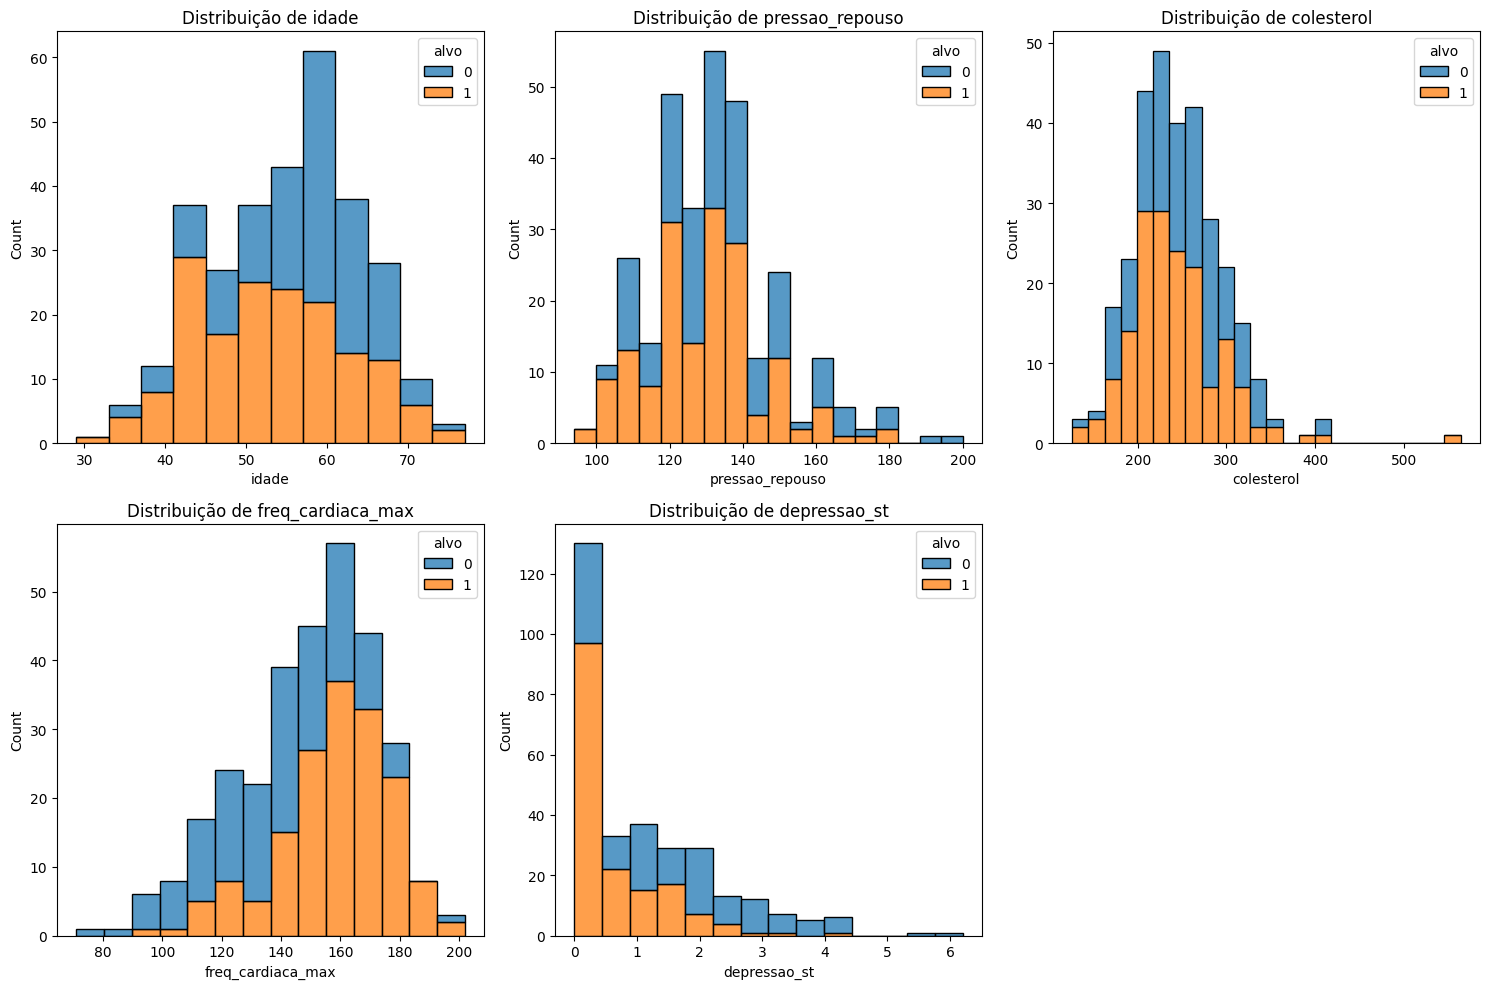

In [7]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis_numericas, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=var, hue="alvo", multiple="stack")
    plt.title(f"Distribuição de {var}")
plt.tight_layout()
plt.show()

Análise de variáveis categóricas

In [8]:
variaveis_categoricas = ["sexo", "tipo_dor_peito", "acucar_sangue", "eletro_repouso", "angina_exercicio", "inclinacao_st", "vasos_principais", "talassemia"]

Explorando a contagem das variáveis categóricas em relação ao "alvo", essa visualização revela a distribuição das classes para cada variável. A análise ajuda a identificar padrões e possíveis associações entre as categorias e os resultados, fornecendo informações valiosas que podem influenciar a escolha do modelo e a estratégia de treinamento

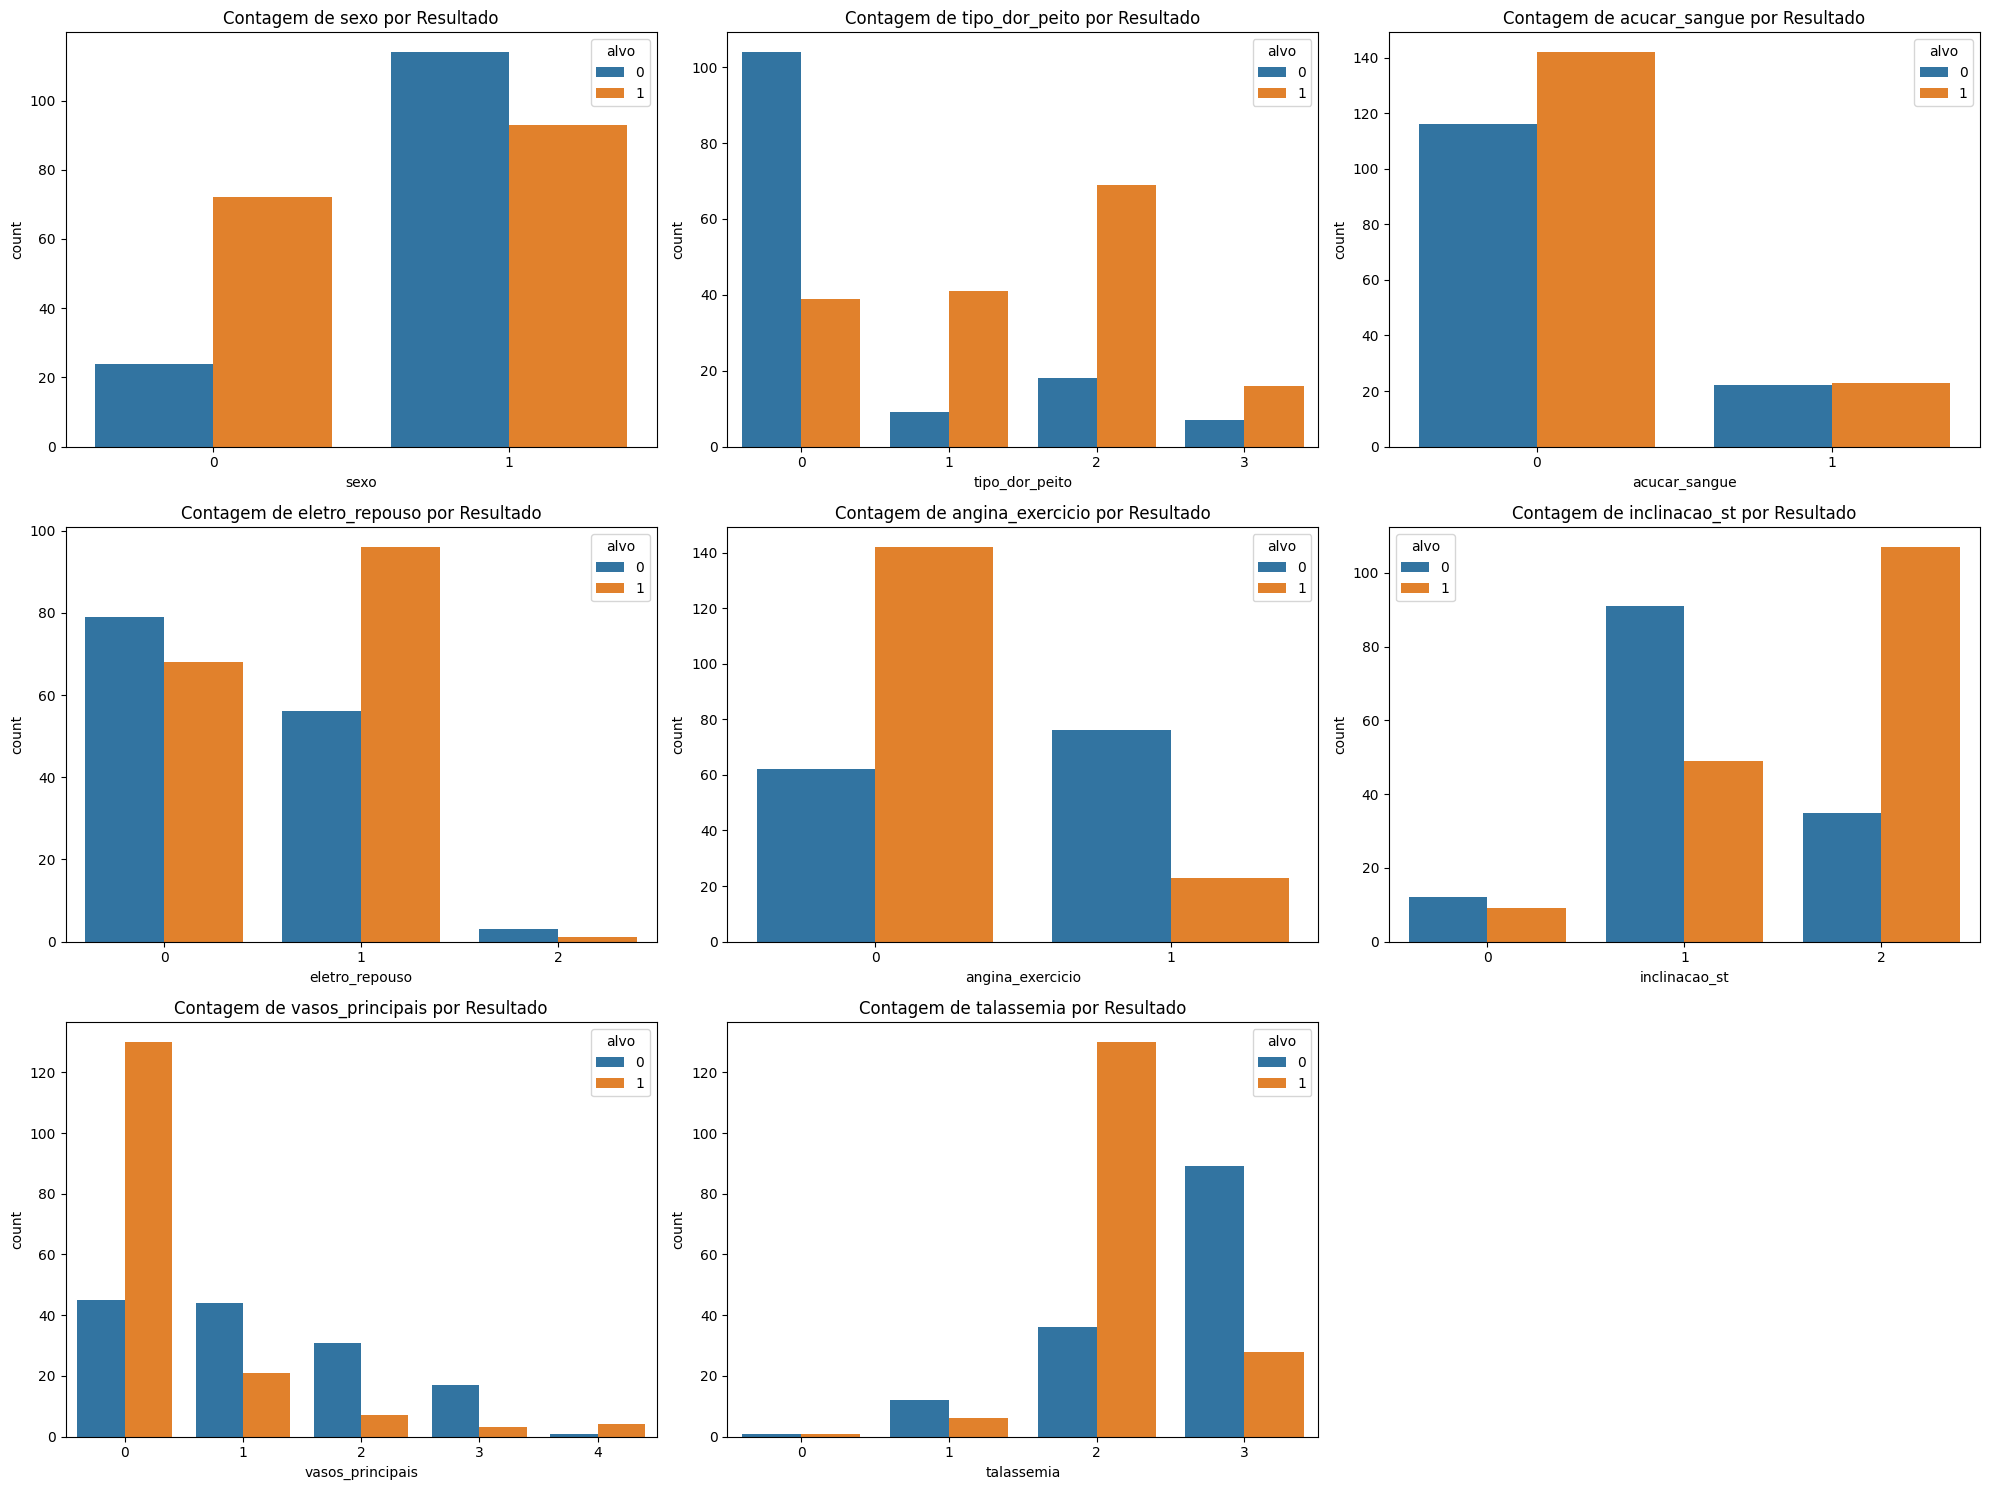

In [9]:
plt.figure(figsize=(20, 15))
for i, var in enumerate(variaveis_categoricas, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=var, hue="alvo")
    plt.title(f"Contagem de {var} por Resultado")
plt.tight_layout()
plt.show()

Analisando o mapa de calor de correlação, podemos visualizar a relação entre as variáveis do conjunto de dados, destacando como cada uma se correlaciona com as demais. Essa visualização oferece uma compreensão rápida das interações entre as variáveis, permitindo identificar aquelas que podem ter um impacto significativo no "alvo" antes do treinamento do modelo

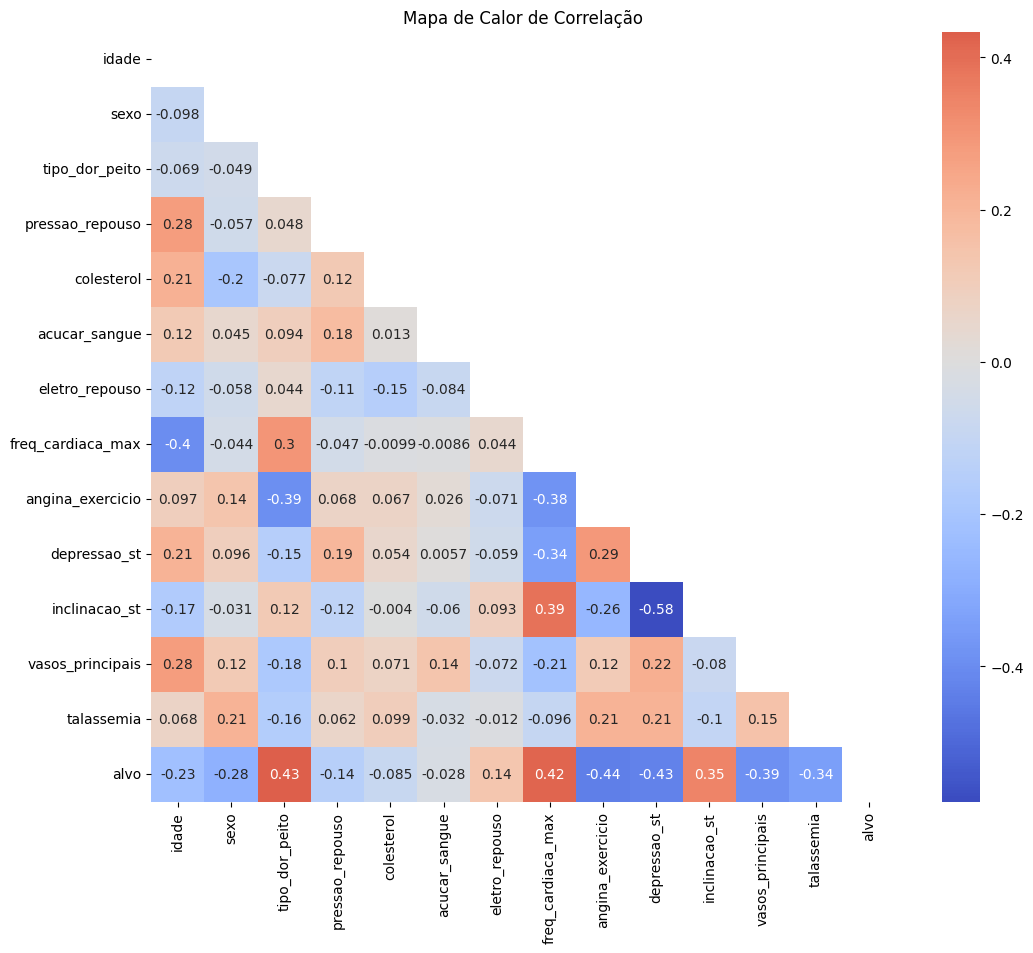

In [10]:
plt.figure(figsize=(12, 10))
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de Calor de Correlação")
plt.show()

Explorando a distribuição das características e a separação das classes, os boxplots revelam insights iniciais sobre como as variáveis numéricas se comportam em relação ao "alvo", ajudando a identificar potenciais padrões e outliers antes do treinamento do modelo

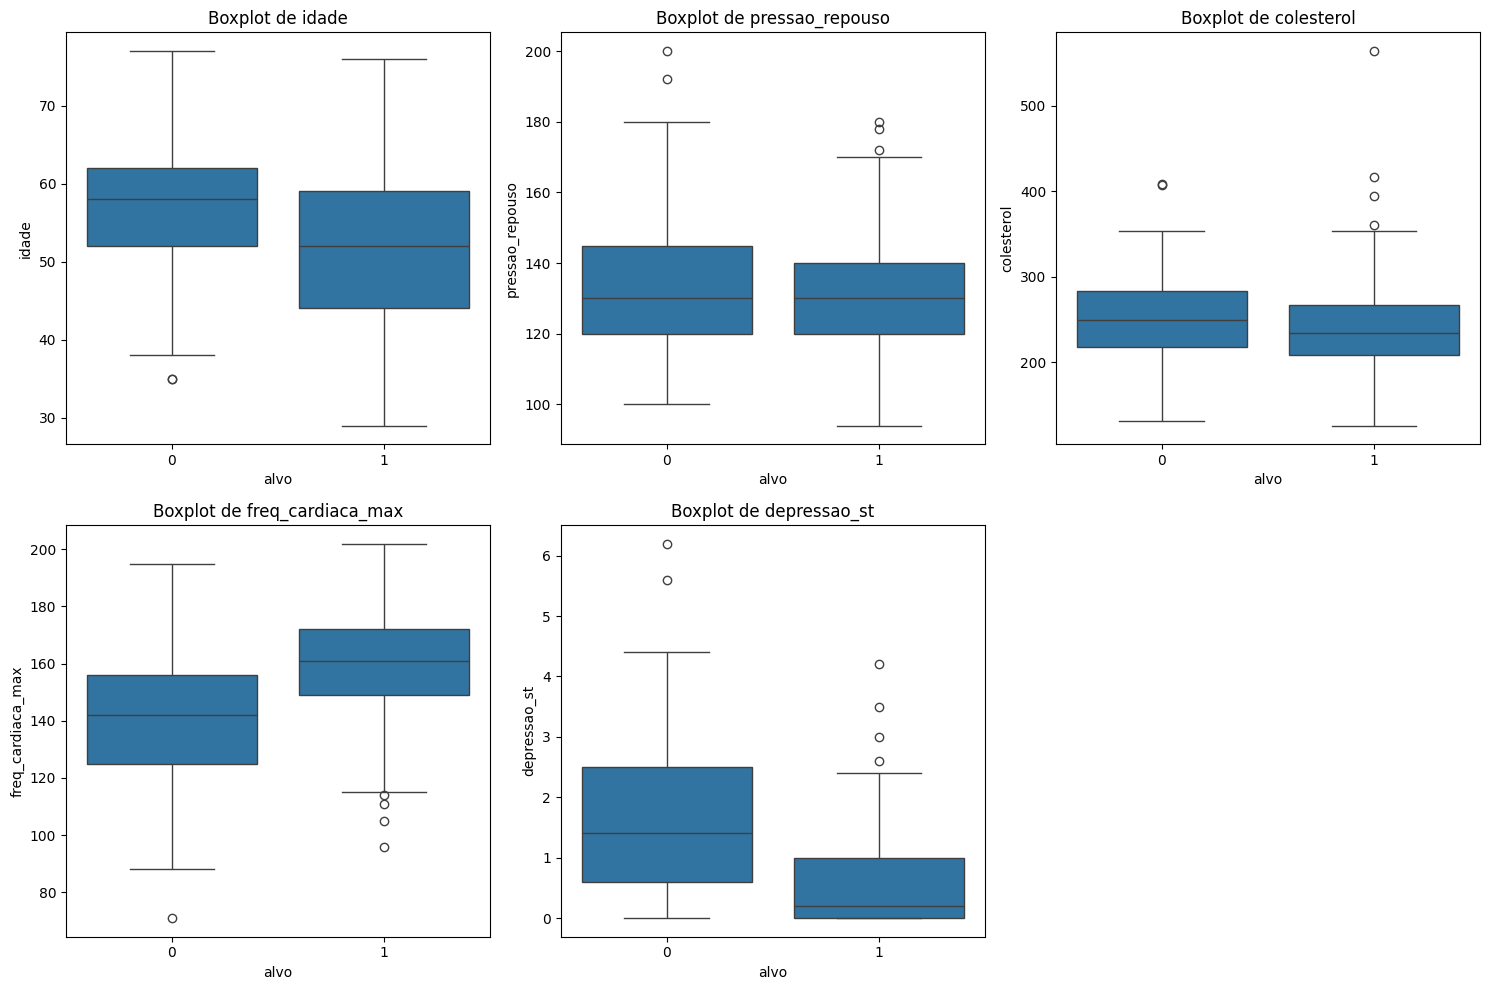

In [11]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=var, x="alvo")
    plt.title(f"Boxplot de {var}")
plt.tight_layout()
plt.show()

Explorando a distribuição das características e a separação das classes, proporcionando insights iniciais sobre os dados antes do treinamento do modelo

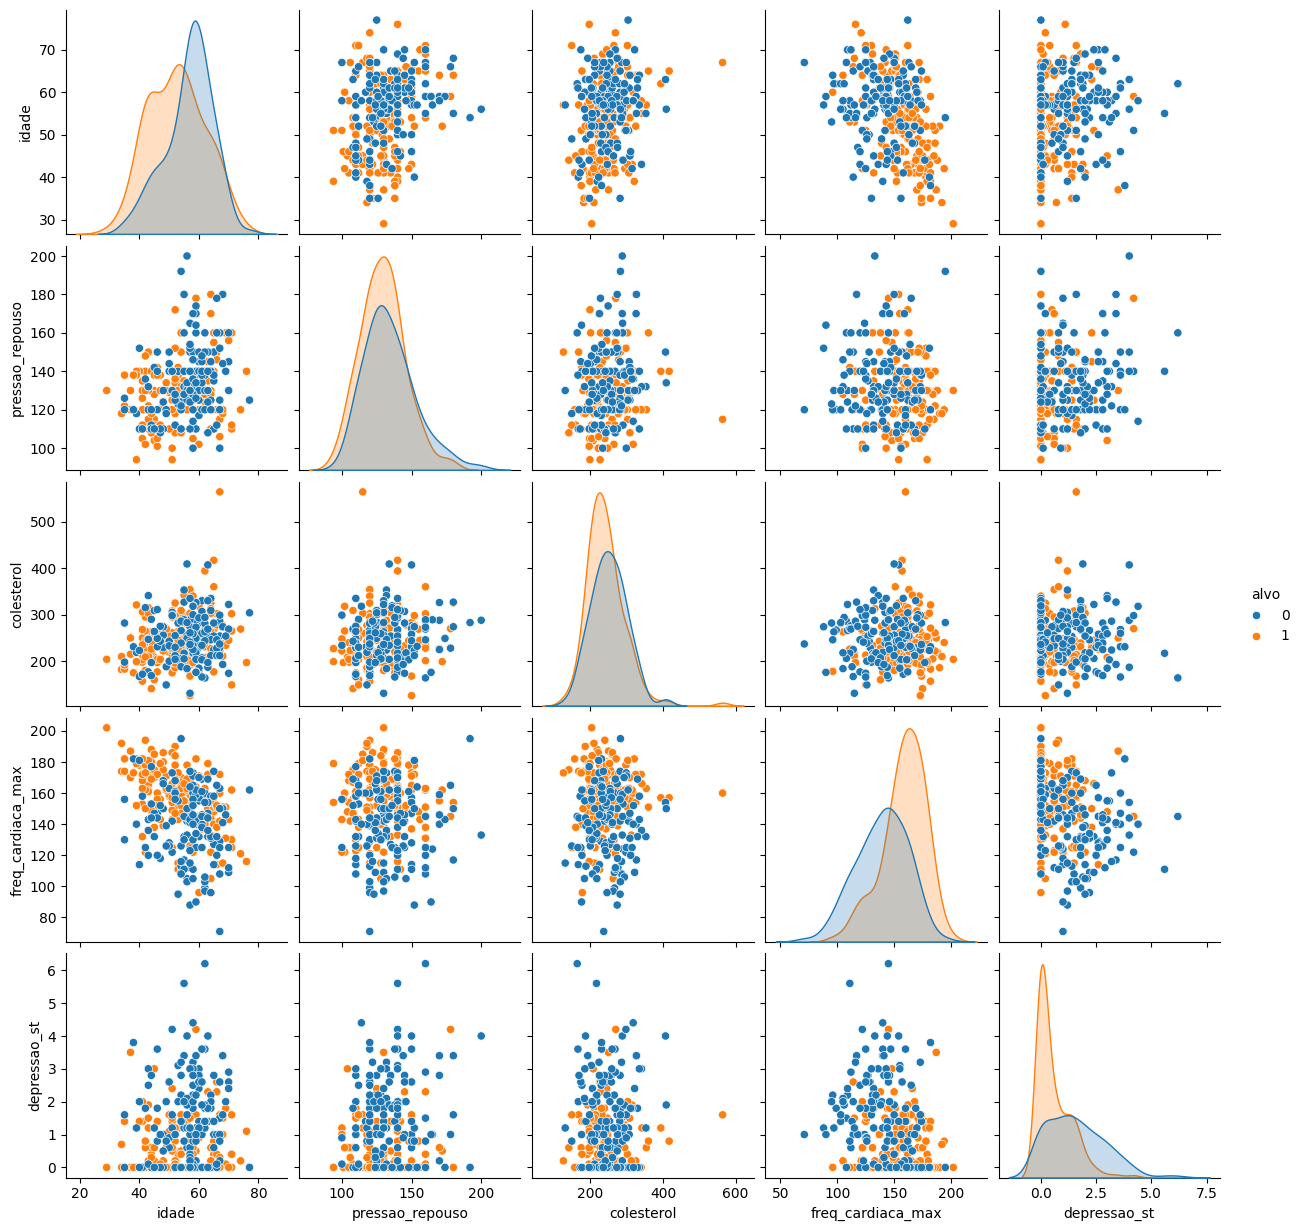

In [12]:
sns.pairplot(df[variaveis_numericas + ["alvo"]], hue="alvo")
plt.show()

Na linha de código, estou separando o conjunto de dados em variáveis independentes e dependentes

In [13]:
X = df.drop("alvo", axis=1)
y = df["alvo"]

Divisão treino/teste

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Escalonamento

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Ao implementar a função "avaliar_modelo_cv", consigo realizar uma validação cruzada em cinco partes para o modelo fornecido. Essa função calcula a acurácia média e o desvio padrão das pontuações, permitindo uma avaliação robusta da performance do modelo. A média das acurácias é retornada para uso posterior, e as métricas são impressas, destacando a variabilidade dos resultados, o que é essencial para entender a estabilidade do modelo em diferentes subconjuntos de dados

In [16]:
def avaliar_modelo_cv(modelo, nome, X, y):
    cv_scores = cross_val_score(modelo, X, y, cv=5)
    print(f"\nResultados da Validação Cruzada para {nome}:")
    print(f"Acurácia média: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    return cv_scores.mean()

Na definição do dicionário de modelos, incluo três algoritmos de aprendizado de máquina: a **Regressão Logística**, que é útil para problemas de classificação binária, a **Árvore de Decisão**, que oferece uma interpretação visual simples e fácil, e o **SVM (Máquina de Vetores de Suporte)**, que é eficaz em espaços de alta dimensão e pode ser ajustado para problemas não lineares, dado que a opção probability=True permite calcular as probabilidades das classes. Essa seleção proporciona uma boa variedade de abordagens para análise de dados

In [17]:
modelos = {
    "Regressão Logística": LogisticRegression(random_state=42),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True)
}

Na construção do dicionário de resultados, realizo a validação cruzada para cada modelo presente no dicionário de modelos, armazenando o desempenho médio das métricas. Em seguida, cada modelo é treinado com o conjunto completo de dados e suas previsões são feitas no conjunto de teste. As métricas de precisão são calculadas e armazenadas, permitindo uma análise comparativa da performance dos modelos

In [18]:
resultados = {}
for nome, modelo in modelos.items():
    # Validação cruzada
    cv_score = avaliar_modelo_cv(modelo, nome, X_train_scaled, y_train)
    
    # Treinamento no conjunto completo
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    
    # Métricas
    acc = accuracy_score(y_test, y_pred)
    resultados[nome] = {
        "cv_score": cv_score,
        "test_accuracy": acc,
        "modelo": modelo
    }


Resultados da Validação Cruzada para Regressão Logística:
Acurácia média: 0.8180 (+/- 0.0997)

Resultados da Validação Cruzada para Árvore de Decisão:
Acurácia média: 0.7397 (+/- 0.0849)

Resultados da Validação Cruzada para SVM:
Acurácia média: 0.8224 (+/- 0.0539)


Criando uma figura para plotar as Curvas ROC de cada modelo, calculando a probabilidade predita das classes, e, em seguida, obtendo as taxas de falsos positivos e verdadeiros positivos. Cada curva é plotada com uma legenda que inclui a AUC, facilitando a comparação do desempenho dos modelos

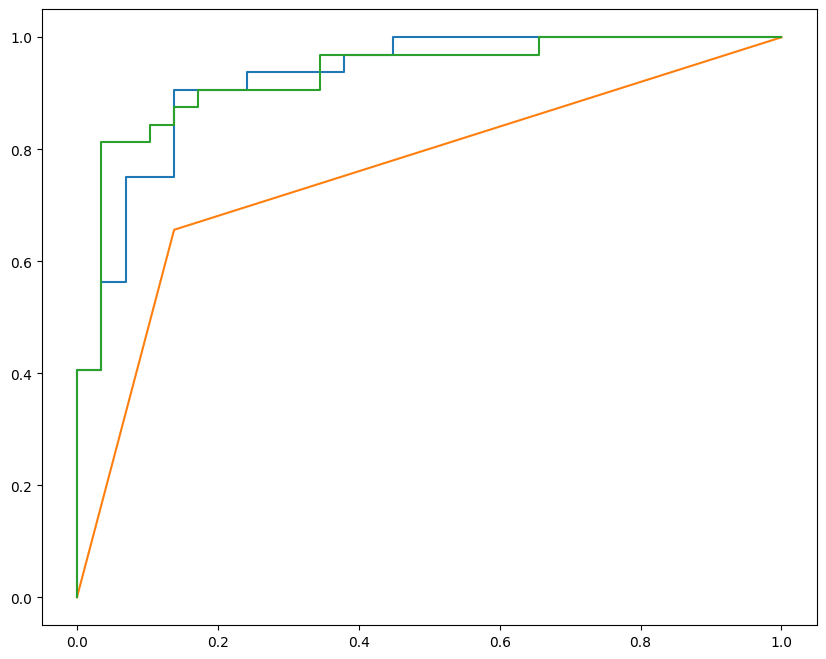

In [19]:
plt.figure(figsize=(10, 8))
for nome, res in resultados.items():
    modelo = res["modelo"]
    y_pred_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nome} (AUC = {roc_auc:.2f})")

Configurando a área do gráfico para plotar as Curvas ROC, estabelecendo as limitações do eixo X e Y, além de adicionar rótulos e um título, proporcionando uma visualização clara da relação entre a taxa de falsos positivos e a taxa de verdadeiros positivos

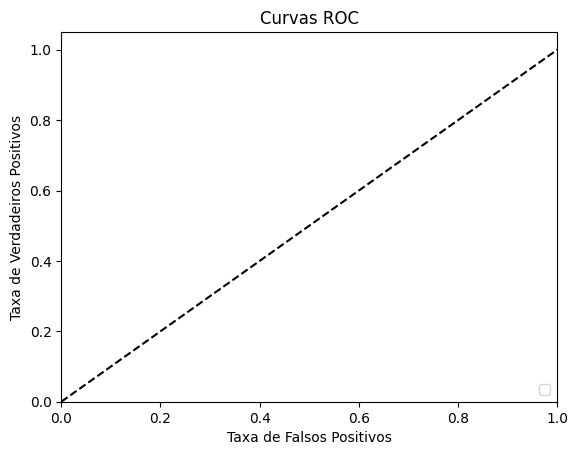

In [20]:
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curvas ROC")
plt.legend(loc="lower right")
plt.show()

Criando um DataFrame que está listando as features do modelo de Árvore de Decisão junto com suas respectivas importâncias, organizando-as em ordem decrescente para identificar as variáveis mais relevantes no modelo

In [21]:
arvore = resultados["Árvore de Decisão"]["modelo"]
importancia_features = pd.DataFrame({
    "feature": X.columns,
    "importancia": arvore.feature_importances_
}).sort_values("importancia", ascending=False)

Gerando um gráfico de barras que está destacando a importância das features no modelo de Árvore de Decisão, visualizando quais variáveis têm maior influência nas previsões

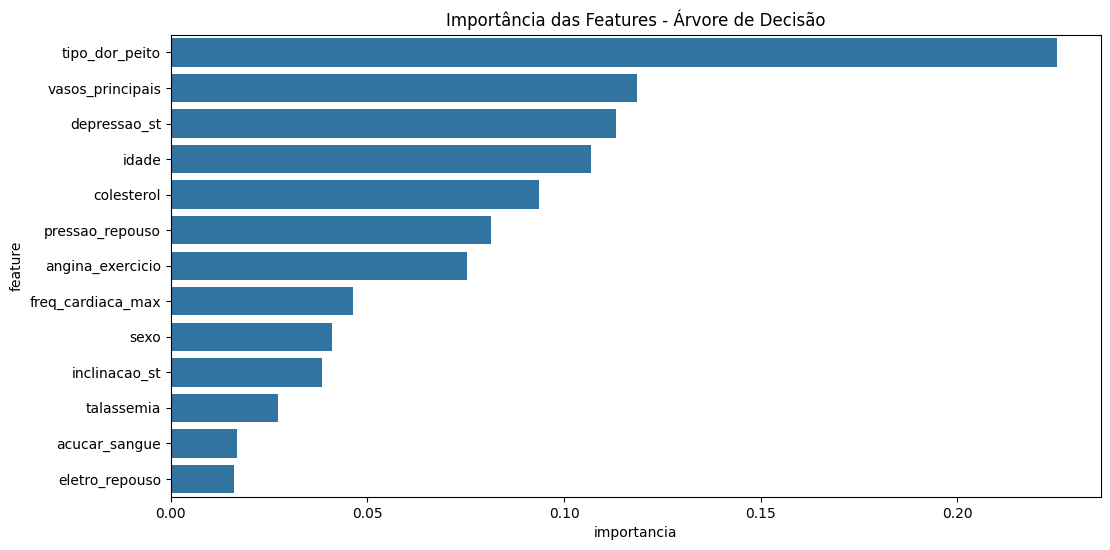

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x="importancia", y="feature", data=importancia_features)
plt.title("Importância das Features - Árvore de Decisão")
plt.show()

Criando um DataFrame que está listando as features do modelo de Regressão Logística junto com a magnitude absoluta de seus coeficientes, organizando-as em ordem decrescente de importância

In [23]:
reg_log = resultados["Regressão Logística"]["modelo"]
coef_log = pd.DataFrame({
    "feature": X.columns,
    "coeficiente": abs(reg_log.coef_[0])
}).sort_values("coeficiente", ascending=False)

Gerando um gráfico de barras que está destacando a magnitude dos coeficientes da Regressão Logística, permitindo visualizar a importância de cada feature no modelo

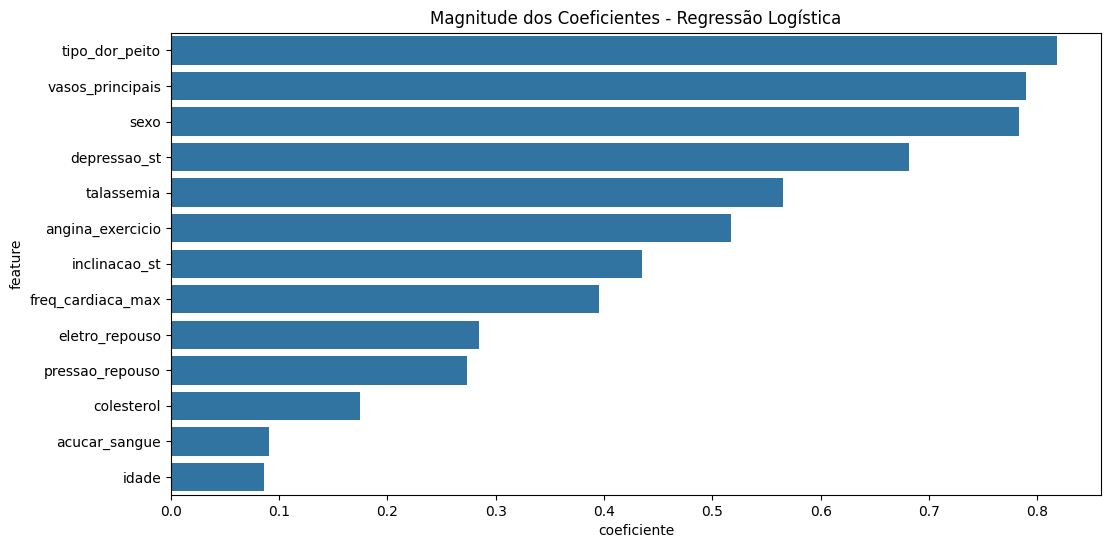

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x="coeficiente", y="feature", data=coef_log)
plt.title("Magnitude dos Coeficientes - Regressão Logística")
plt.show()

Analisando os principais insights e identificando o melhor modelo, o código está listando o modelo mais preciso, destacando as 5 features mais importantes e mostrando as correlações mais fortes com o alvo

In [25]:
print("\nPrincipais Insights:")
print("1. Modelo com melhor performance:", max(resultados.items(), key=lambda x: x[1]["test_accuracy"])[0])
print("\n2. Features mais importantes:")
for _, row in importancia_features.head().iterrows():
    print(f"   - {row['feature']}: {row['importancia']:.4f}")

print("\n3. Correlações mais fortes com o alvo:")
correlacoes_alvo = abs(correlation["alvo"]).sort_values(ascending=False)[1:6]
for feat, corr in correlacoes_alvo.items():
    print(f"   - {feat}: {corr:.4f}")


Principais Insights:
1. Modelo com melhor performance: SVM

2. Features mais importantes:
   - tipo_dor_peito: 0.2253
   - vasos_principais: 0.1185
   - depressao_st: 0.1133
   - idade: 0.1067
   - colesterol: 0.0937

3. Correlações mais fortes com o alvo:
   - angina_exercicio: 0.4368
   - tipo_dor_peito: 0.4338
   - depressao_st: 0.4307
   - freq_cardiaca_max: 0.4217
   - vasos_principais: 0.3917
